In [28]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('4_f_1.csv')

In [14]:
data_list = data['data'].values

1.	По заданному массиву кардиоинтервалов рассчитать спектральную плотность мощности и построить ее график.

In [24]:
#1.	разбивка записи на три сегмента
tmp_list1 = np.arange(100)
tmp_list2 = np.arange(100)
tmp_list3 = np.arange(100)
i, i1, i2, i3 = 0, 0, 0, 0

for i in range(300):
    if (i < 99):
        tmp_list1[i1] = data_list[i]
        i +=1
        i1 += 1
    if (i < 200 and i > 99):
        tmp_list2[i2] = data_list[i]
        i +=1
        i2 += 1
    if (i < 299 and i > 199):
        tmp_list3[i3] = data_list[i]
        i +=1
        i3 += 1
print ('Сегмент 1:')
print(tmp_list1)
print ('Сегмент 2:')
print(tmp_list2)
print ('Сегмент 3:')
print(tmp_list3)

Сегмент 1:
[866 927 924 892 897 903 859 865 883 894 868 874 916 953 945 909 925 934
 843 860 892 903 876 863 884 871 895 906 869 878 889 884 848 761 791 844
 875 873 832 854 868 877 850 840 783 696 735 792 744 782 786 793 774 736
 745 804 880 864 873 893 873 836 853 858 842 850 883 909 897 866 880 890
 859 840 854 851 819 869 897 843 784 802 799 805 742 692 713 815 905 903
 861 907 891 865 903 919 820 825 851  99]
Сегмент 2:
[843 852 874 876 811 833 858 842 848 805 748 764 822 846 865 850 794 735
 787 863 924 903 887 885 822 796 835 762 861 846 799 853 910 926 913 829
 809 794 774 728 717 748 832 874 820 856 823 764 776 840 919 924 908 921
 944 907 815 836 883 851 853 846 839 886 863 773 722 800 905 950 977 967
 911 869 805 734 715 747 770 736 707 720 725 794 888 931 917 878 857 869
 877 898 840 875 898 898 801 774 845 880]
Сегмент 3:
[ 823  823  746  704  735  800  830  821  765  836  905  913  843  733
  768  839  940  868  789  700  687  732  847  855  794  787  829  847
  852  833 

In [26]:
#2.	преобразование Фурье ряда значений xi, i = 1,2,…,N, с использованием БПФ;
Xl1 = np.fft.fft(tmp_list1)
Xl2 = np.fft.fft(tmp_list2)
Xl3 = np.fft.fft(tmp_list3)
    
print ('Сегмент 1:')
print(Xl1)
print ('Сегмент 2:')
print(Xl2)
print ('Сегмент 3:')
print(Xl3)

Сегмент 1:
[ 8.45100000e+04+0.00000000e+00j  7.07284425e+02-8.97823877e+02j
 -1.45252448e+03-1.47677398e+03j  5.33399155e+02+4.81130756e+01j
 -1.20444935e+03+4.05686762e+02j -5.79375131e+02+3.55260220e+02j
 -1.63873284e+03-3.37916477e+02j -4.96411538e+02-4.28785403e+02j
 -5.61365402e+02-1.47955048e+03j -5.97110805e+02-1.24736578e+03j
  8.27441986e+01-2.40884824e+02j -1.00851631e+03-7.11762297e+02j
 -4.37110912e+02-2.93765550e+02j -8.93962423e+02-4.97042416e+02j
 -1.51065047e+02-7.89818340e+02j -7.50057022e+02-1.15213685e+03j
 -1.76063450e+02-8.52256677e+02j -5.41097531e+01-1.08831796e+03j
 -1.98505632e+02-5.08357187e+02j -7.44340221e+00-4.11740788e+01j
 -4.94761193e+02-9.36065951e+02j -5.57659250e+02-6.59021949e+02j
 -9.92241353e+01-7.85517353e+02j  3.05349647e+02-7.26079396e+02j
  1.30124307e+02-8.75279600e+02j  1.31000000e+02-4.31000000e+02j
 -2.66058266e+02-1.18440311e+03j -1.15045881e+02-7.10158798e+02j
 -1.30735205e+02-4.96883553e+02j -1.75498328e+02-7.05937743e+02j
  2.01255801e+

In [29]:
#3.	нормирование амплитуд спектра Xl умножением на sqtr(2);
i = 0
for i in range(100):
    Xl1[i] = Xl1[i]*math.sqrt(2)
    Xl2[i] = Xl2[i]*math.sqrt(2)
    Xl3[i] = Xl3[i]*math.sqrt(2)
    i += 1
print ('Сегмент 1:')
print(Xl1)
print ('Сегмент 2:')
print(Xl2)
print ('Сегмент 3:')
print(Xl3)

Сегмент 1:
[ 1.19515188e+05+0.00000000e+00j  1.00025123e+03-1.26971470e+03j
 -2.05417982e+03-2.08847380e+03j  7.54340319e+02+6.80421640e+01j
 -1.70334860e+03+5.73727721e+02j -8.19360168e+02+5.02413821e+02j
 -2.31751821e+03-4.77886064e+02j -7.02031929e+02-6.06394132e+02j
 -7.93890565e+02-2.09240036e+03j -8.44442198e+02-1.76404160e+03j
  1.17017968e+02-3.40662585e+02j -1.42625744e+03-1.00658389e+03j
 -6.18168181e+02-4.15447225e+02j -1.26425378e+03-7.02924126e+02j
 -2.13638238e+02-1.11697181e+03j -1.06074081e+03-1.62936756e+03j
 -2.48991319e+02-1.20527295e+03j -7.65227467e+01-1.53911402e+03j
 -2.80729357e+02-7.18925628e+02j -1.05265604e+01-5.82289406e+01j
 -6.99697989e+02-1.32379716e+03j -7.88649275e+02-9.31997778e+02j
 -1.40324118e+02-1.11088929e+03j  4.31829612e+02-1.02683133e+03j
  1.84023560e+02-1.23783228e+03j  1.85261977e+02-6.09526045e+02j
 -3.76263208e+02-1.67499894e+03j -1.62699445e+02-1.00431620e+03j
 -1.84887500e+02-7.02699459e+02j -2.48192116e+02-9.98346730e+02j
  2.84618684e+

In [44]:
#4.	определение спектральной плотности мощности по формуле...
Pl1 = np.arange(50, dtype=complex)
Pl2 = np.arange(50, dtype=complex)
Pl3 = np.arange(50, dtype=complex)

i, l= 0, 0
for i in range(100):
    for l in range(49):
        Pl1[l] = 50*Xl1[l]*Xl1[l]
        Pl2[l] = 50*Xl2[l]*Xl2[l]
        Pl3[l] = 50*Xl3[l]*Xl3[l]
        l += 1
    i +=1
print ('Сегмент 1:')
print(Pl1)
print ('Сегмент 2:')
print(Pl2)
print ('Сегмент 3:')
print(Pl3)

Сегмент 1:
[ 7.14194010e+11+0.00000000e+00j -3.05836456e+07-1.27003369e+08j
 -7.10340355e+06+4.29010073e+08j  2.82199791e+07+5.13269478e+06j
  1.28611648e+08-9.77258313e+07j  2.09465719e+07-4.11657873e+07j
  2.57125779e+08+1.10750966e+08j  6.25674929e+06+4.25708042e+07j
 -1.87393852e+08+1.66113690e+08j -1.19938008e+08+1.48963117e+08j
 -5.11788961e+06-3.98636435e+06j  5.10499573e+07+1.43564777e+08j
  1.04767752e+07+2.56816255e+07j  5.52117650e+07+8.88674485e+07j
 -6.00992361e+07+2.38627888e+07j -7.64833794e+07+1.72833667e+08j
 -6.95343105e+07+3.00102501e+07j -1.18150813e+08+1.17777233e+07j
 -2.19022544e+07+2.01823529e+07j -1.63990053e+05+6.12950458e+04j
 -6.31430827e+07+9.26258214e+07j -1.23326090e+07+7.35019372e+07j
 -6.07192083e+07+1.55884560e+07j -4.33952882e+07-4.43416174e+07j
 -7.49182043e+07-2.27790303e+07j -1.68600000e+07-1.12922000e+07j
 -1.33202373e+08+6.30240474e+07j -4.91089963e+07+1.63401689e+07j
 -2.29801571e+07+1.29920346e+07j -4.67548433e+07+2.47781788e+07j
 -7.81293104e+

In [ ]:
#5.	линейное усреднение Pl по сегментам.


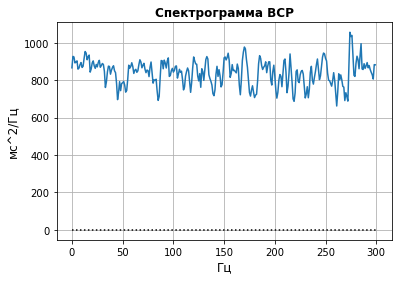

In [47]:
#тут просто код, он рисует не то от слова совсем....
norm_data_list = [item for item in data_list]

plt.plot(norm_data_list[0:512])
plt.grid()
plt.hlines(0, 0, 300, linestyle = ':')
x_label = plt.xlabel('Гц', fontsize=12)
y_label = plt.ylabel('мс^2/Гц', fontsize=12)
title = plt.title('Спектрограмма ВСР', fontweight="bold")

2.	В соответствии с таблицей 1 рассчитать мощности спектров в каждом из указанных диапазоне частот, указать их минимальное и максимальное значения. 

3.	В соответствии с таблицей 1 рассчитать мощности спектров в каждом из указанных диапазоне частот, указать их минимальное и максимальное значения. 

4.	По полученным данным рассчитать индекс централизации ИЦ (IC), индекс вагосимпатического взаимодействия ИВВ и индекс активации подкорковых нервных центров ИАП (ISCA).